In [1]:
# The jupyter script is used to carry out the analysis of group runs
# this is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
# take average of music therpy group per task
# take average of control group per task
# run 12 second sliding window on each group per task
# dataset is resampled due to undersampling during the recording
# ICA, notch and bandpass filtering are implmeneted to mitigate eeg noise
# results: spectogram and average bandpower comparison betwen timepoints per channel per brainwave

In [2]:
from helper import*
from params import*

In [3]:
"extract EEG scans from database"
table_names = allSQLTableNames(hostName,userName,userPassword,databaseName)
tables = multiSQLTablesToDataframes(hostName,userName,userPassword,databaseName,table_names)
input = multiTransformTableToRawEEG(tables,fs,collection_time,fs_setting)
allRawEEG = input[0]
time_s = input[1]

MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
M

In [4]:
"""
Index of filename per group per task for both the music therapy and control group
coding example:
                MT11 = MUSIC THERAPY (GROUP 1,TASK 1)
                CT11 = CONTROL (GROUP 1,TASK 1)
"""
#   index of filename per group per task for the music therapy group
idx_MT11 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[0]))
idx_MT12 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[1]))
idx_MT13 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[2]))
idx_MT21 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[0]))
idx_MT22 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[1]))
idx_MT23 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[2]))
#  index of filename per group per task for the control group
idx_CT11 = list(mit.locate(table_names, lambda x: x in controlGroup_1[0]))
idx_CT12 = list(mit.locate(table_names, lambda x: x in controlGroup_1[1]))
idx_CT13 = list(mit.locate(table_names, lambda x: x in controlGroup_1[2]))
idx_CT21 = list(mit.locate(table_names, lambda x: x in controlGroup_2[0]))  
idx_CT22 = list(mit.locate(table_names, lambda x: x in controlGroup_2[1]))
idx_CT23 = list(mit.locate(table_names, lambda x: x in controlGroup_2[2]))

In [5]:
"use indices from above to extract eeg for both the music therapy and control group"
#   EEG for music therapy group per timepoint per task
avgEEG_MT11 = np.mean(allRawEEG[idx_MT11],axis=0)
avgEEG_MT12 = np.mean(allRawEEG[idx_MT12],axis=0)
avgEEG_MT13 = np.mean(allRawEEG[idx_MT13],axis=0)
avgEEG_MT21 = np.mean(allRawEEG[idx_MT21],axis=0)
avgEEG_MT22 = np.mean(allRawEEG[idx_MT22],axis=0)
avgEEG_MT23 = np.mean(allRawEEG[idx_MT23],axis=0)
#   EEG for control group per timepoint per task
avgEEG_CT11 = np.mean(allRawEEG[idx_CT11],axis=0)
avgEEG_CT12 = np.mean(allRawEEG[idx_CT12],axis=0)
avgEEG_CT13 = np.mean(allRawEEG[idx_CT13],axis=0)
avgEEG_CT21 = np.mean(allRawEEG[idx_CT21],axis=0)
avgEEG_CT22 = np.mean(allRawEEG[idx_CT22],axis=0)
avgEEG_CT23 = np.mean(allRawEEG[idx_CT23],axis=0)

In [6]:
"Compute DWT analysis on the averaged raw EEG data"
#   compute ICA for music therapy group
dwt_MT11 = multiChannelDWT(avgEEG_MT11,time_s,wavelet)
dwt_MT12 = multiChannelDWT(avgEEG_MT12,time_s,wavelet)
dwt_MT13 = multiChannelDWT(avgEEG_MT13,time_s,wavelet)
dwt_MT21 = multiChannelDWT(avgEEG_MT21,time_s,wavelet)
dwt_MT22 = multiChannelDWT(avgEEG_MT22,time_s,wavelet)
dwt_MT23 = multiChannelDWT(avgEEG_MT23,time_s,wavelet)
#   compute dwt for control group
dwt_CT11 = multiChannelDWT(avgEEG_CT11,time_s,wavelet)
dwt_CT12 = multiChannelDWT(avgEEG_CT12,time_s,wavelet)
dwt_CT13 = multiChannelDWT(avgEEG_CT13,time_s,wavelet)
dwt_CT21 = multiChannelDWT(avgEEG_CT21,time_s,wavelet)
dwt_CT22 = multiChannelDWT(avgEEG_CT22,time_s,wavelet)
dwt_CT23 = multiChannelDWT(avgEEG_CT23,time_s,wavelet)

In [7]:
"Compute the notch filtered EEG for both the music therapy and control group"
noc=filters()
#   notch filtered EEG for music therapy group
notch_MT11 = noc.notch(dwt_MT11,line,fs,Q)
notch_MT12 = noc.notch(dwt_MT12,line,fs,Q)
notch_MT13 = noc.notch(dwt_MT13,line,fs,Q)
notch_MT21 = noc.notch(dwt_MT21,line,fs,Q)
notch_MT22 = noc.notch(dwt_MT22,line,fs,Q)
notch_MT23 = noc.notch(dwt_MT23,line,fs,Q)
#   notch filtered EEG for control group
notch_CT11 = noc.notch(dwt_CT11,line,fs,Q)
notch_CT12 = noc.notch(dwt_CT12,line,fs,Q)
notch_CT13 = noc.notch(dwt_CT13,line,fs,Q)
notch_CT21 = noc.notch(dwt_CT21,line,fs,Q)
notch_CT22 = noc.notch(dwt_CT22,line,fs,Q)
notch_CT23 = noc.notch(dwt_CT23,line,fs,Q)

In [8]:
"Generate the band pass filtered EEG for both the music therapy and control group"
bp = filters()
#   band pass filtered EEG for music therapy group
bp_MT11 = bp.butterBandPass(notch_MT11,lowcut,highcut,fs,order)
bp_MT12 = bp.butterBandPass(notch_MT12,lowcut,highcut,fs,order)
bp_MT13 = bp.butterBandPass(notch_MT13,lowcut,highcut,fs,order)
bp_MT21 = bp.butterBandPass(notch_MT21,lowcut,highcut,fs,order)
bp_MT22 = bp.butterBandPass(notch_MT22,lowcut,highcut,fs,order)
bp_MT23 = bp.butterBandPass(notch_MT23,lowcut,highcut,fs,order)
#   band pass filtered EEG for control group
bp_CT11 = bp.butterBandPass(notch_CT11,lowcut,highcut,fs,order)
bp_CT12 = bp.butterBandPass(notch_CT12,lowcut,highcut,fs,order)
bp_CT13 = bp.butterBandPass(notch_CT13,lowcut,highcut,fs,order)
bp_CT21 = bp.butterBandPass(notch_CT21,lowcut,highcut,fs,order)
bp_CT22 = bp.butterBandPass(notch_CT22,lowcut,highcut,fs,order)
bp_CT23 = bp.butterBandPass(notch_CT23,lowcut,highcut,fs,order)

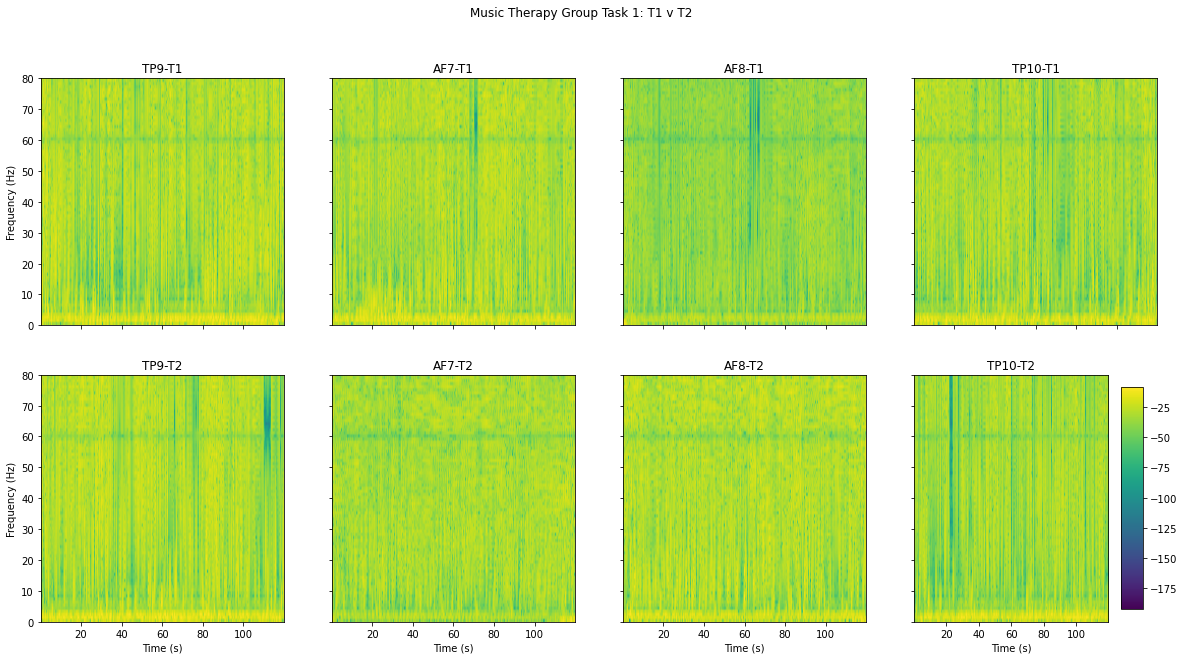

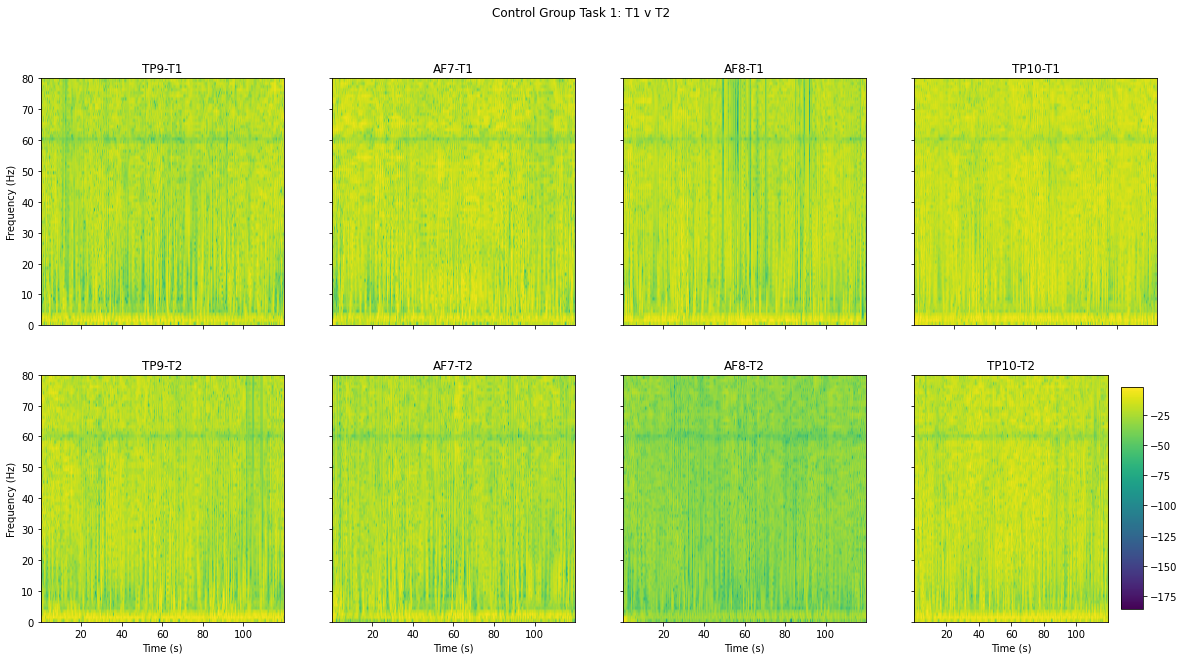

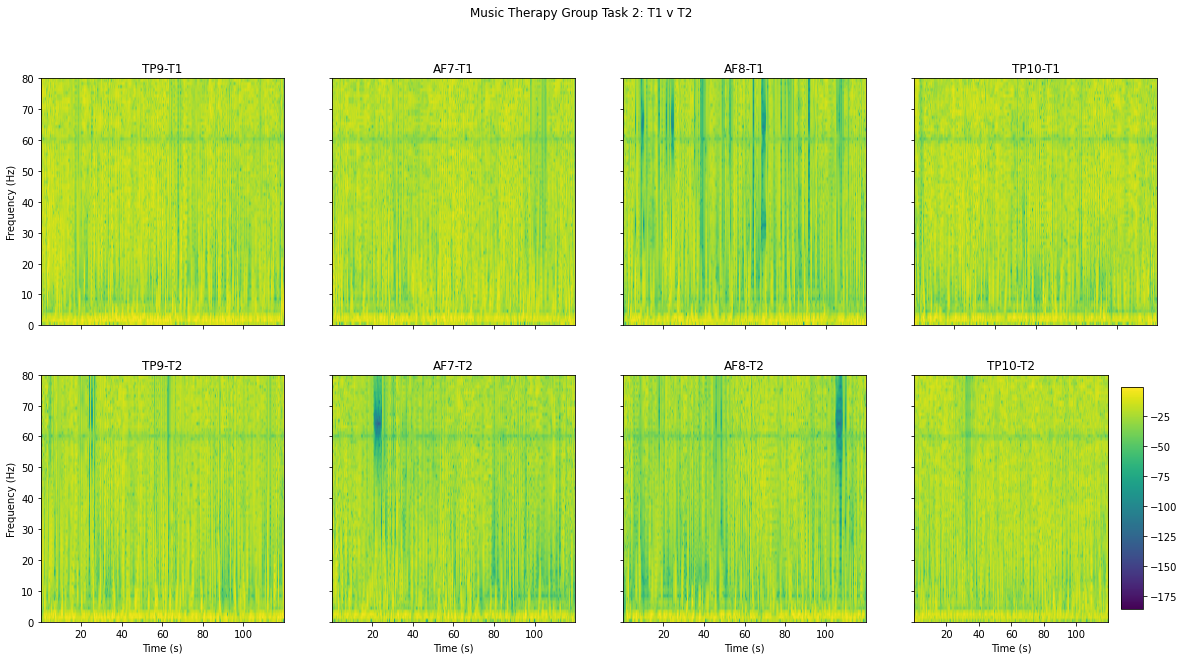

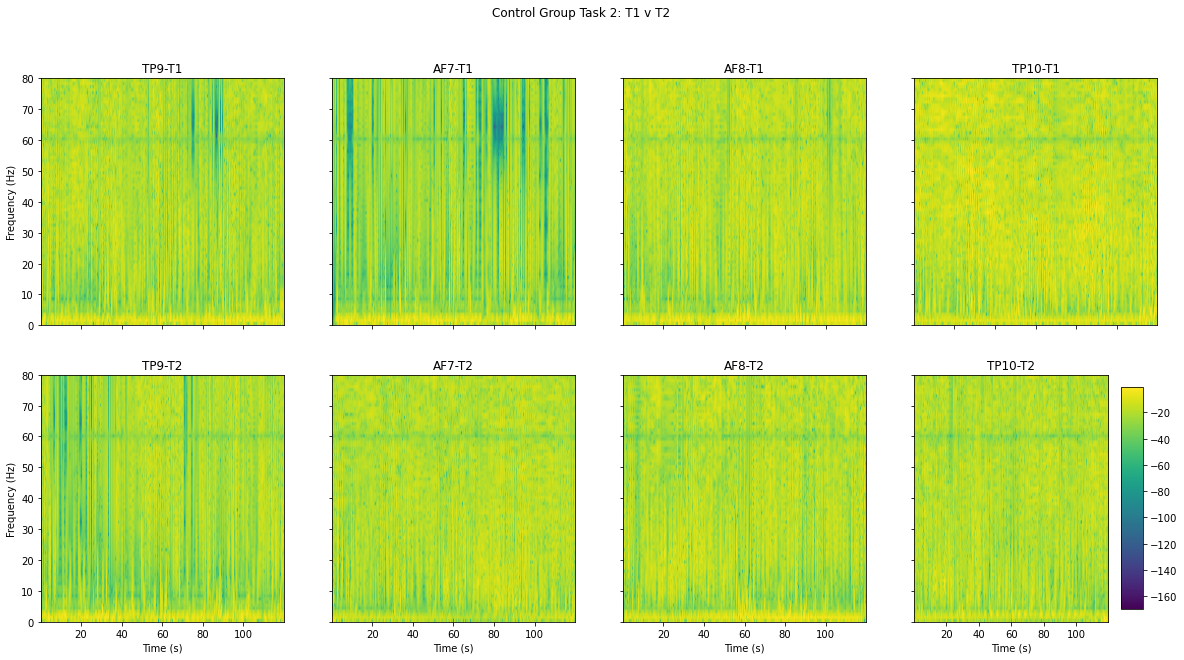

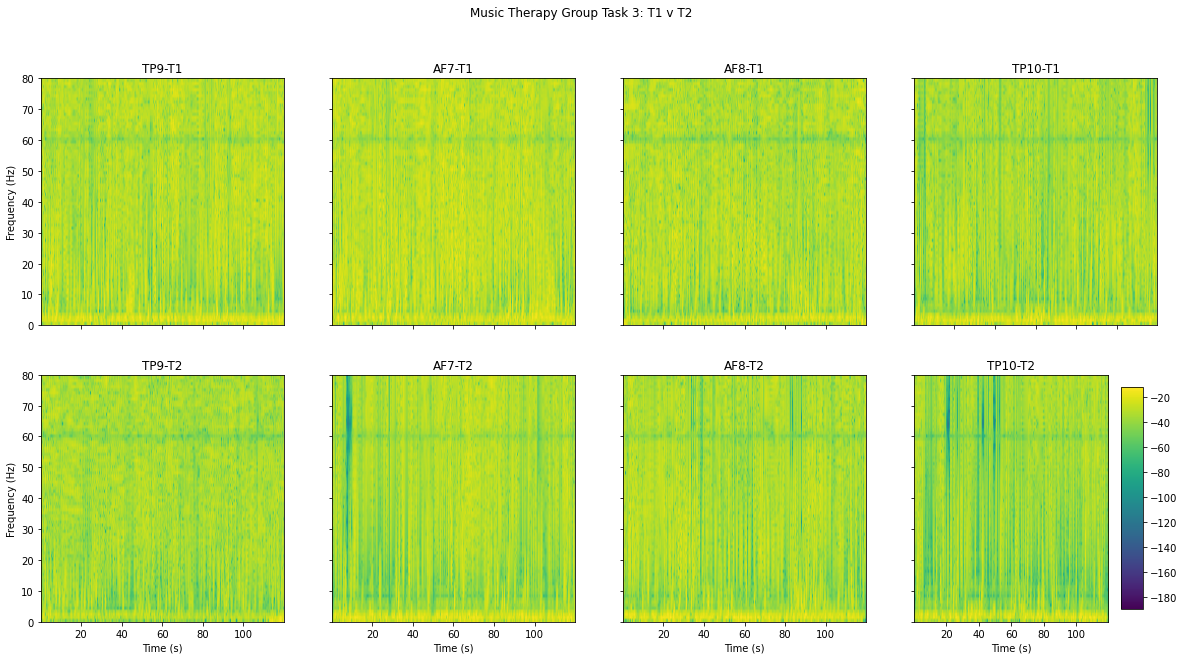

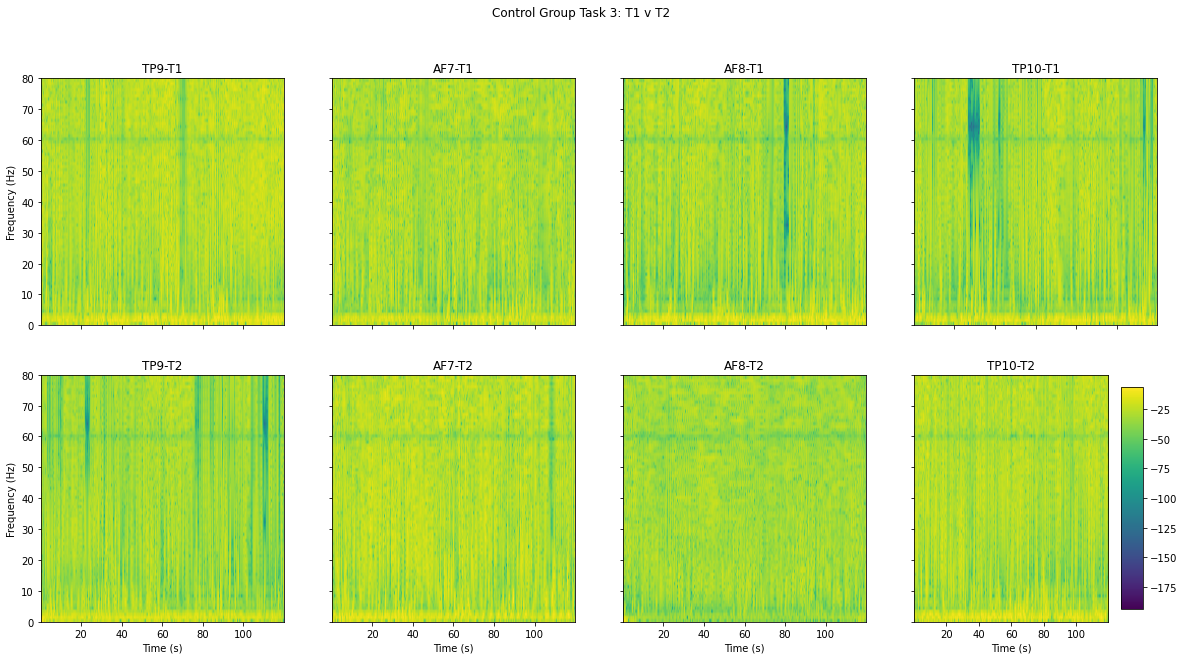

In [9]:
"Generate spectogram for both the music therapy and control group"
spectogramPlot((np.hstack((bp_MT11,bp_MT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((bp_CT11,bp_CT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((bp_MT12,bp_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((bp_CT12,bp_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((bp_MT13,bp_MT23))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 3: T1 v T2')
spectogramPlot((np.hstack((bp_CT13,bp_CT23))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 3: T1 v T2')

In [10]:
"Generate rolling window arrays for both the music therapy and control group"
#   rolling window arrays for music therapy group
rw_MT11 = rollingWindow(bp_MT11,window_size,step_size)
rw_MT12 = rollingWindow(bp_MT12,window_size,step_size)
rw_MT13 = rollingWindow(bp_MT13,window_size,step_size)
rw_MT21 = rollingWindow(bp_MT21,window_size,step_size)
rw_MT22 = rollingWindow(bp_MT22,window_size,step_size)
rw_MT23 = rollingWindow(bp_MT23,window_size,step_size)
#   rolling window arrays for control group
rw_CT11 = rollingWindow(bp_CT11,window_size,step_size)
rw_CT12 = rollingWindow(bp_CT12,window_size,step_size)
rw_CT13 = rollingWindow(bp_CT13,window_size,step_size)
rw_CT21 = rollingWindow(bp_CT21,window_size,step_size)
rw_CT22 = rollingWindow(bp_CT22,window_size,step_size)
rw_CT23 = rollingWindow(bp_CT23,window_size,step_size)

In [11]:
"compute power spectrum of each window per channel"
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

In [12]:
"Compute the average band power for both the music therapy and control group"
#   compute average delta band power for both music therapy and control group
delta_MT11 = averageBandPower(rw_MT11,'3D',fs,delta_low,delta_high,win)
delta_MT12 = averageBandPower(rw_MT12,'3D',fs,delta_low,delta_high,win)
delta_MT13 = averageBandPower(rw_MT13,'3D',fs,delta_low,delta_high,win)
delta_MT21 = averageBandPower(rw_MT21,'3D',fs,delta_low,delta_high,win)
delta_MT22 = averageBandPower(rw_MT22,'3D',fs,delta_low,delta_high,win)
delta_MT23 = averageBandPower(rw_MT23,'3D',fs,delta_low,delta_high,win)
delta_CT11 = averageBandPower(rw_CT11,'3D',fs,delta_low,delta_high,win)
delta_CT12 = averageBandPower(rw_CT12,'3D',fs,delta_low,delta_high,win)
delta_CT13 = averageBandPower(rw_CT13,'3D',fs,delta_low,delta_high,win)
delta_CT21 = averageBandPower(rw_CT21,'3D',fs,delta_low,delta_high,win)
delta_CT22 = averageBandPower(rw_CT22,'3D',fs,delta_low,delta_high,win)
delta_CT23 = averageBandPower(rw_CT23,'3D',fs,delta_low,delta_high,win)
#   compute average theta band power for both music therapy and control group
theta_MT11 = averageBandPower(rw_MT11,'3D',fs,theta_low,theta_high,win)
theta_MT12 = averageBandPower(rw_MT12,'3D',fs,theta_low,theta_high,win)
theta_MT13 = averageBandPower(rw_MT13,'3D',fs,theta_low,theta_high,win)
theta_MT21 = averageBandPower(rw_MT21,'3D',fs,theta_low,theta_high,win)
theta_MT22 = averageBandPower(rw_MT22,'3D',fs,theta_low,theta_high,win)
theta_MT23 = averageBandPower(rw_MT23,'3D',fs,theta_low,theta_high,win)
theta_CT11 = averageBandPower(rw_CT11,'3D',fs,theta_low,theta_high,win)
theta_CT12 = averageBandPower(rw_CT12,'3D',fs,theta_low,theta_high,win)
theta_CT13 = averageBandPower(rw_CT13,'3D',fs,theta_low,theta_high,win)
theta_CT21 = averageBandPower(rw_CT21,'3D',fs,theta_low,theta_high,win)
theta_CT22 = averageBandPower(rw_CT22,'3D',fs,theta_low,theta_high,win)
theta_CT23 = averageBandPower(rw_CT23,'3D',fs,theta_low,theta_high,win)
#   compute average alpha band power for both music therapy and control group
alpha_MT11 = averageBandPower(rw_MT11,'3D',fs,alpha_low,alpha_high,win)
alpha_MT12 = averageBandPower(rw_MT12,'3D',fs,alpha_low,alpha_high,win)
alpha_MT13 = averageBandPower(rw_MT13,'3D',fs,alpha_low,alpha_high,win)
alpha_MT21 = averageBandPower(rw_MT21,'3D',fs,alpha_low,alpha_high,win)
alpha_MT22 = averageBandPower(rw_MT22,'3D',fs,alpha_low,alpha_high,win)
alpha_MT23 = averageBandPower(rw_MT23,'3D',fs,alpha_low,alpha_high,win)
alpha_CT11 = averageBandPower(rw_CT11,'3D',fs,alpha_low,alpha_high,win)
alpha_CT12 = averageBandPower(rw_CT12,'3D',fs,alpha_low,alpha_high,win)
alpha_CT13 = averageBandPower(rw_CT13,'3D',fs,alpha_low,alpha_high,win)
alpha_CT21 = averageBandPower(rw_CT21,'3D',fs,alpha_low,alpha_high,win)
alpha_CT22 = averageBandPower(rw_CT22,'3D',fs,alpha_low,alpha_high,win)
alpha_CT23 = averageBandPower(rw_CT23,'3D',fs,alpha_low,alpha_high,win)
#   compute average beta band power for both music therapy and control group
beta_MT11 = averageBandPower(rw_MT11,'3D',fs,beta_low,beta_high,win)
beta_MT12 = averageBandPower(rw_MT12,'3D',fs,beta_low,beta_high,win)
beta_MT13 = averageBandPower(rw_MT13,'3D',fs,beta_low,beta_high,win)
beta_MT21 = averageBandPower(rw_MT21,'3D',fs,beta_low,beta_high,win)
beta_MT22 = averageBandPower(rw_MT22,'3D',fs,beta_low,beta_high,win)
beta_MT23 = averageBandPower(rw_MT23,'3D',fs,beta_low,beta_high,win)
beta_CT11 = averageBandPower(rw_CT11,'3D',fs,beta_low,beta_high,win)
beta_CT12 = averageBandPower(rw_CT12,'3D',fs,beta_low,beta_high,win)
beta_CT13 = averageBandPower(rw_CT13,'3D',fs,beta_low,beta_high,win)
beta_CT21 = averageBandPower(rw_CT21,'3D',fs,beta_low,beta_high,win)
beta_CT22 = averageBandPower(rw_CT22,'3D',fs,beta_low,beta_high,win)
beta_CT23 = averageBandPower(rw_CT23,'3D',fs,beta_low,beta_high,win)
#   compute average theta to beta ratio for both music therapy and control group
theta_beta_MT11 = theta_MT11/beta_MT11
theta_beta_MT12 = theta_MT12/beta_MT12
theta_beta_MT13 = theta_MT13/beta_MT13
theta_beta_MT21 = theta_MT21/beta_MT21
theta_beta_MT22 = theta_MT22/beta_MT22
theta_beta_MT23 = theta_MT23/beta_MT23
theta_beta_CT11 = theta_CT11/beta_CT11
theta_beta_CT12 = theta_CT12/beta_CT12
theta_beta_CT13 = theta_CT13/beta_CT13
theta_beta_CT21 = theta_CT21/beta_CT21
theta_beta_CT22 = theta_CT22/beta_CT22
theta_beta_CT23 = theta_CT23/beta_CT23
#   compute average alpha to beta ratio for both music therapy and control group
alpha_beta_MT11 = alpha_MT11/beta_MT11
alpha_beta_MT12 = alpha_MT12/beta_MT12
alpha_beta_MT13 = alpha_MT13/beta_MT13
alpha_beta_MT21 = alpha_MT21/beta_MT21
alpha_beta_MT22 = alpha_MT22/beta_MT22
alpha_beta_MT23 = alpha_MT23/beta_MT23
alpha_beta_CT11 = alpha_CT11/beta_CT11
alpha_beta_CT12 = alpha_CT12/beta_CT12
alpha_beta_CT13 = alpha_CT13/beta_CT13
alpha_beta_CT21 = alpha_CT21/beta_CT21
alpha_beta_CT22 = alpha_CT22/beta_CT22
alpha_beta_CT23 = alpha_CT23/beta_CT23

arou = np.sum([[2,2,2],[3,3,3]],axis=0)/np.sum([[2,2,2],[3,3,3]],axis=0)
#   compute average gamma band power for both music therapy and control group
gamma_MT11 = averageBandPower(rw_MT11,'3D',fs,gamma_low,gamma_high,win)
gamma_MT12 = averageBandPower(rw_MT12,'3D',fs,gamma_low,gamma_high,win)
gamma_MT13 = averageBandPower(rw_MT13,'3D',fs,gamma_low,gamma_high,win)
gamma_MT21 = averageBandPower(rw_MT21,'3D',fs,gamma_low,gamma_high,win)
gamma_MT22 = averageBandPower(rw_MT22,'3D',fs,gamma_low,gamma_high,win)
gamma_MT23 = averageBandPower(rw_MT23,'3D',fs,gamma_low,gamma_high,win)
gamma_CT11 = averageBandPower(rw_CT11,'3D',fs,gamma_low,gamma_high,win)
gamma_CT12 = averageBandPower(rw_CT12,'3D',fs,gamma_low,gamma_high,win)
gamma_CT13 = averageBandPower(rw_CT13,'3D',fs,gamma_low,gamma_high,win)
gamma_CT21 = averageBandPower(rw_CT21,'3D',fs,gamma_low,gamma_high,win)
gamma_CT22 = averageBandPower(rw_CT22,'3D',fs,gamma_low,gamma_high,win)
gamma_CT23 = averageBandPower(rw_CT23,'3D',fs,gamma_low,gamma_high,win)

#   compute arousal and valence both music therapy and control group
arousal_MT11 = np.sum([beta_MT11[:,1],beta_MT11[:,2]],axis=0)/np.sum([alpha_MT11[:,1],alpha_MT11[:,2]],axis=0)
arousal_MT11 = arousal_MT11.reshape(arousal_MT11.shape[0],1)
arousal_MT12 = np.sum([beta_MT12[:,1],beta_MT12[:,2]],axis=0)/np.sum([alpha_MT12[:,1],alpha_MT12[:,2]],axis=0)
arousal_MT12 = arousal_MT12.reshape(arousal_MT12.shape[0],1)
arousal_MT13 = np.sum([beta_MT13[:,1],beta_MT13[:,2]],axis=0)/np.sum([alpha_MT13[:,1],alpha_MT13[:,2]],axis=0)
arousal_MT13 = arousal_MT13.reshape(arousal_MT13.shape[0],1)
arousal_MT21 = np.sum([beta_MT21[:,1],beta_MT21[:,2]],axis=0)/np.sum([alpha_MT21[:,1],alpha_MT21[:,2]],axis=0)
arousal_MT21 = arousal_MT21.reshape(arousal_MT21.shape[0],1)
arousal_MT22 = np.sum([beta_MT22[:,1],beta_MT22[:,2]],axis=0)/np.sum([alpha_MT22[:,1],alpha_MT22[:,2]],axis=0)
arousal_MT22 = arousal_MT22.reshape(arousal_MT22.shape[0],1)
arousal_MT23 = np.sum([beta_MT23[:,1],beta_MT23[:,2]],axis=0)/np.sum([alpha_MT23[:,1],alpha_MT23[:,2]],axis=0)
arousal_MT23 = arousal_MT23.reshape(arousal_MT23.shape[0],1)
arousal_CT11 = np.sum([beta_CT11[:,1],beta_CT11[:,2]],axis=0)/np.sum([alpha_CT11[:,1],alpha_CT11[:,2]],axis=0)  
arousal_CT11 = arousal_CT11.reshape(arousal_CT11.shape[0],1)
arousal_CT12 = np.sum([beta_CT12[:,1],beta_CT12[:,2]],axis=0)/np.sum([alpha_CT12[:,1],alpha_CT12[:,2]],axis=0)
arousal_CT12 = arousal_CT12.reshape(arousal_CT12.shape[0],1)
arousal_CT13 = np.sum([beta_CT13[:,1],beta_CT13[:,2]],axis=0)/np.sum([alpha_CT13[:,1],alpha_CT13[:,2]],axis=0)
arousal_CT13 = arousal_CT13.reshape(arousal_CT13.shape[0],1)
arousal_CT21 = np.sum([beta_CT21[:,1],beta_CT21[:,2]],axis=0)/np.sum([alpha_CT21[:,1],alpha_CT21[:,2]],axis=0)
arousal_CT21 = arousal_CT21.reshape(arousal_CT21.shape[0],1)
arousal_CT22 = np.sum([beta_CT22[:,1],beta_CT22[:,2]],axis=0)/np.sum([alpha_CT22[:,1],alpha_CT22[:,2]],axis=0)
arousal_CT22 = arousal_CT22.reshape(arousal_CT22.shape[0],1)
arousal_CT23 = np.sum([beta_CT23[:,1],beta_CT23[:,2]],axis=0)/np.sum([alpha_CT23[:,1],alpha_CT23[:,2]],axis=0)
arousal_CT23 = arousal_CT23.reshape(arousal_CT23.shape[0],1)

valence_MT11 =  alpha_MT11[:,2]-alpha_MT11[:,1]
valence_MT11 = valence_MT11.reshape(valence_MT11.shape[0],1)
valence_MT12 =  alpha_MT12[:,2]-alpha_MT12[:,1]
valence_MT12 = valence_MT12.reshape(valence_MT12.shape[0],1)
valence_MT13 =  alpha_MT13[:,2]-alpha_MT13[:,1]
valence_MT13 = valence_MT13.reshape(valence_MT13.shape[0],1)
valence_MT21 =  alpha_MT21[:,2]-alpha_MT21[:,1]
valence_MT21 = valence_MT21.reshape(valence_MT21.shape[0],1)
valence_MT22 =  alpha_MT22[:,2]-alpha_MT22[:,1]
valence_MT22 = valence_MT22.reshape(valence_MT22.shape[0],1)
valence_MT23 =  alpha_MT23[:,2]-alpha_MT23[:,1]
valence_MT23 = valence_MT23.reshape(valence_MT23.shape[0],1)
valence_CT11 =  alpha_CT11[:,2]-alpha_CT11[:,1]
valence_CT11 = valence_CT11.reshape(valence_CT11.shape[0],1)
valence_CT12 =  alpha_CT12[:,2]-alpha_CT12[:,1]
valence_CT12 = valence_CT12.reshape(valence_CT12.shape[0],1)
valence_CT13 =  alpha_CT13[:,2]-alpha_CT13[:,1]
valence_CT13 = valence_CT13.reshape(valence_CT13.shape[0],1)
valence_CT21 =  alpha_CT21[:,2]-alpha_CT21[:,1]
valence_CT21 = valence_CT21.reshape(valence_CT21.shape[0],1)
valence_CT22 =  alpha_CT22[:,2]-alpha_CT22[:,1]
valence_CT22 = valence_CT22.reshape(valence_CT22.shape[0],1)
valence_CT23 =  alpha_CT23[:,2]-alpha_CT23[:,1]
valence_CT23 = valence_CT23.reshape(valence_CT23.shape[0],1)

In [13]:
#   compute average delta band power for both music therapy and control group
data_pre = np.vstack((delta_CT11,delta_CT12,delta_CT13,delta_MT11,delta_MT12,delta_MT13,
                    theta_CT11,theta_CT12,theta_CT13,theta_MT11,theta_MT12,theta_MT13,
                    alpha_CT11,alpha_CT12,alpha_CT13,beta_CT11,alpha_MT11,alpha_MT12,alpha_MT13,
                    beta_CT11,beta_CT12,beta_CT13,beta_MT11,beta_MT12,beta_MT13,
                    gamma_CT11,gamma_CT12,gamma_CT13,gamma_MT11,gamma_MT12,gamma_MT13,
                    theta_beta_MT11,theta_beta_MT12,theta_beta_MT13,theta_beta_CT11,theta_beta_CT12,theta_beta_CT13,
                    alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13,alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13,))

data_post = np.vstack((delta_CT21,delta_CT22,delta_CT23,delta_MT21,delta_MT22,delta_MT23,
                    theta_CT21,theta_CT22,theta_CT23,theta_MT21,theta_MT22,theta_MT23,
                    alpha_CT21,alpha_CT22,alpha_CT23,beta_CT21,alpha_MT21,alpha_MT22,alpha_MT23,
                    beta_CT21,beta_CT22,beta_CT23,beta_MT21,beta_MT22,beta_MT23,
                    gamma_CT21,gamma_CT22,gamma_CT23,gamma_MT21,gamma_MT22,gamma_MT23,
                    theta_beta_MT21,theta_beta_MT22,theta_beta_MT23,theta_beta_CT21,theta_beta_CT22,theta_beta_CT23,
                    alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23,alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23,))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))
diff = data_pre - data_post
test_1 = normalityTest(diff)

....Executing Shapiro Wilks Test.......... 

Shapiro Wilks Test: data is not normally distributed, P-Value= 0.0

....confirming Shapiro Wilks Test non-normality result with D’Agostino’s K^2 test.......

Executing D’Agostino’s K^2 Test...
D’Agostino’s K^2 Test: data is not normally distributed, P-Value= 0.0

....confirming D’Agostino’s K^2 Test non-normality result with Anderson-Darling Test.......

Executing Anderson-Darling Test...
Statistic: 3233.758
15.000: 0.576, Anderson-Darling Test: data is not normally distributed
10.000: 0.656, Anderson-Darling Test: data is not normally distributed
5.000: 0.787, Anderson-Darling Test: data is not normally distributed
2.500: 0.918, Anderson-Darling Test: data is not normally distributed
1.000: 1.092, Anderson-Darling Test: data is not normally distributed

 Wilcoxon Signed Test utilized to evaluate significance of data


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
data_pre = np.vstack((valence_MT11,valence_MT12,valence_MT13,valence_CT11,valence_CT12,valence_CT13,
                    arousal_MT11,arousal_MT12,arousal_MT13,arousal_CT11,arousal_CT12,arousal_CT13))
data_pre = data_pre.reshape(data_pre.shape[0])
data_post = np.vstack((valence_MT21,valence_MT22,valence_MT23,valence_CT21,valence_CT22,valence_CT23,
                    arousal_MT21,arousal_MT22,arousal_MT23,arousal_CT21,arousal_CT22,arousal_CT23))
data_post = data_post.reshape(data_post.shape[0])
diff = data_pre-data_post
test_2 = normalityTest(diff)

....Executing Shapiro Wilks Test.......... 

Shapiro Wilks Test: data is not normally distributed, P-Value= 0.0

....confirming Shapiro Wilks Test non-normality result with D’Agostino’s K^2 test.......

Executing D’Agostino’s K^2 Test...
D’Agostino’s K^2 Test: data is not normally distributed, P-Value= 0.0

....confirming D’Agostino’s K^2 Test non-normality result with Anderson-Darling Test.......

Executing Anderson-Darling Test...
Statistic: 205.000
15.000: 0.574, Anderson-Darling Test: data is not normally distributed
10.000: 0.654, Anderson-Darling Test: data is not normally distributed
5.000: 0.785, Anderson-Darling Test: data is not normally distributed
2.500: 0.915, Anderson-Darling Test: data is not normally distributed
1.000: 1.089, Anderson-Darling Test: data is not normally distributed

 Wilcoxon Signed Test utilized to evaluate significance of data


In [15]:
"""
Compute Wilcoxon Signed Test for the difference between the average delta band power for the two groups
Coding Example:
                MT12 = MUSIC THERAPY (GROUP 1,GROUP 2)
                CT12 = CONTROL (GROUP 1,GROUP 2)
"""
test_type = test_1
#   compute paired t-test for the difference between the average delta band power for the two groups
print ('DELTA BAND')
ttest_delta_MT1121 = statTest(test_type,delta_MT11,delta_MT21, show_output=True,variableName='delta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1222 = statTest(test_type,delta_MT12,delta_MT22, show_output=True,variableName='delta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1323 = statTest(test_type,delta_MT13,delta_MT23, show_output=True,variableName='delta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1121 = statTest(test_type,delta_CT11,delta_CT21, show_output=True,variableName='delta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1222 = statTest(test_type,delta_CT12,delta_CT22, show_output=True,variableName='delta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1323 = statTest(test_type,delta_CT13,delta_CT23, show_output=True,variableName='delta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average theta band power for the two groups
print ('THETA BAND')
ttest_theta_MT1121 = statTest(test_type,theta_MT11,theta_MT21, show_output=True,variableName='theta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1222 = statTest(test_type,theta_MT12,theta_MT22, show_output=True,variableName='theta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1323 = statTest(test_type,theta_MT13,theta_MT23, show_output=True,variableName='theta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1121 = statTest(test_type,theta_CT11,theta_CT21, show_output=True,variableName='theta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1222 = statTest(test_type,theta_CT12,theta_CT22, show_output=True,variableName='theta_CT1222',channelName=['TP9','AF7','AF8','TP10'])   
ttest_theta_CT1323 = statTest(test_type,theta_CT13,theta_CT23, show_output=True,variableName='theta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average alpha band power for the two groups
print ('ALPHA BAND')
ttest_alpha_MT1121 = statTest(test_type,alpha_MT11,alpha_MT21, show_output=True,variableName='alpha_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1222 = statTest(test_type,alpha_MT12,alpha_MT22, show_output=True,variableName='alpha_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1323 = statTest(test_type,alpha_MT13,alpha_MT23, show_output=True,variableName='alpha_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1121 = statTest(test_type,alpha_CT11,alpha_CT21, show_output=True,variableName='alpha_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1222 = statTest(test_type,alpha_CT12,alpha_CT22, show_output=True,variableName='alpha_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1323 = statTest(test_type,alpha_CT13,alpha_CT23, show_output=True,variableName='alpha_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average beta band power for the two groups
print ('BETA BAND')
ttest_beta_MT1121 = statTest(test_type,beta_MT11,beta_MT21, show_output=True,variableName='beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1222 = statTest(test_type,beta_MT12,beta_MT22, show_output=True,variableName='beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1323 = statTest(test_type,beta_MT13,beta_MT23, show_output=True,variableName='beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1121 = statTest(test_type,beta_CT11,beta_CT21, show_output=True,variableName='beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1222 = statTest(test_type,beta_CT12,beta_CT22, show_output=True,variableName='beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1323 = statTest(test_type,beta_CT13,beta_CT23, show_output=True,variableName='beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average gamma band power for the two groups
print ('GAMMA BAND')
ttest_gamma_MT1121 = statTest(test_type,gamma_MT11,gamma_MT21, show_output=True,variableName='gamma_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1222 = statTest(test_type,gamma_MT12,gamma_MT22, show_output=True,variableName='gamma_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1323 = statTest(test_type,gamma_MT13,gamma_MT23, show_output=True,variableName='gamma_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1121 = statTest(test_type,gamma_CT11,gamma_CT21, show_output=True,variableName='gamma_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1222 = statTest(test_type,gamma_CT12,gamma_CT22, show_output=True,variableName='gamma_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1323 = statTest(test_type,gamma_CT13,gamma_CT23, show_output=True,variableName='gamma_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the theta to beta band power for the two groups
print ('THETA TO BETA BAND')
ttest_theta_beta_MT1121 = statTest(test_type,theta_beta_MT11,theta_beta_MT21, show_output=True,variableName='theta_beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_MT1222 = statTest(test_type,theta_beta_MT12,theta_beta_MT22, show_output=True,variableName='theta_beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_MT1323 = statTest(test_type,theta_beta_MT13,theta_beta_MT23, show_output=True,variableName='theta_beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1121 = statTest(test_type,theta_beta_CT11,theta_beta_CT21, show_output=True,variableName='theta_beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1222 = statTest(test_type,theta_beta_CT12,theta_beta_CT22, show_output=True,variableName='theta_beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1323 = statTest(test_type,theta_beta_CT13,theta_beta_CT23, show_output=True,variableName='theta_beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#  compute paired t-test for the difference between the alpha to beta band power for the two groups
print ('ALPHA TO BETA BAND')
ttest_alpha_beta_MT1121 = statTest(test_type,alpha_beta_MT11,alpha_beta_MT21, show_output=True,variableName='alpha_beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_MT1222 = statTest(test_type,alpha_beta_MT12,alpha_beta_MT22, show_output=True,variableName='alpha_beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_MT1323 = statTest(test_type,alpha_beta_MT13,alpha_beta_MT23, show_output=True,variableName='alpha_beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1121 = statTest(test_type,alpha_beta_CT11,alpha_beta_CT21, show_output=True,variableName='alpha_beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1222 = statTest(test_type,alpha_beta_CT12,alpha_beta_CT22, show_output=True,variableName='alpha_beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1323 = statTest(test_type,alpha_beta_CT13,alpha_beta_CT23, show_output=True,variableName='alpha_beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])


DELTA BAND
delta_MT1121 | TP9 | P-value = 0.02317 | SD | mean decrease
delta_MT1121 | AF7 | P-value = 0.02269 | SD | mean decrease
delta_MT1121 | AF8 | P-value = 0.0779 | NSD | mean decrease
delta_MT1121 | TP10 | P-value = 0.14516 | NSD | mean decrease


delta_MT1222 | TP9 | P-value = 0.67821 | NSD | mean increase
delta_MT1222 | AF7 | P-value = 0.31585 | NSD | mean decrease
delta_MT1222 | AF8 | P-value = 0.1988 | NSD | mean decrease
delta_MT1222 | TP10 | P-value = 0.44968 | NSD | mean decrease


delta_MT1323 | TP9 | P-value = 0.00037 | SD | mean decrease
delta_MT1323 | AF7 | P-value = 0.00024 | SD | mean decrease
delta_MT1323 | AF8 | P-value = 3e-05 | SD | mean decrease
delta_MT1323 | TP10 | P-value = 2e-05 | SD | mean decrease


delta_CT1121 | TP9 | P-value = 0.00152 | SD | mean increase
delta_CT1121 | AF7 | P-value = 0.00276 | SD | mean increase
delta_CT1121 | AF8 | P-value = 0.02417 | SD | mean increase
delta_CT1121 | TP10 | P-value = 0.09565 | NSD | mean increase


delta_CT1222 | T

In [16]:
test_type = test_2
#   compute paired t-test for the difference between the average delta band power for the two groups
print ('VALENCE-AROUSAL ANALYSIS')
ttest_valence_MT1121 = statTest(test_type,valence_MT11,valence_MT21, show_output=True,variableName='valence_MT1121',channelName=['Music'])
ttest_valence_MT1222 = statTest(test_type,valence_MT12,valence_MT22, show_output=True,variableName='valence_MT1222',channelName=['Music'])
ttest_valence_MT1323 = statTest(test_type,valence_MT13,valence_MT23, show_output=True,variableName='valence_MT1323',channelName=['Music'])
ttest_valence_CT1121 = statTest(test_type,valence_CT11,valence_CT21, show_output=True,variableName='valence_CT1121',channelName=['Control'])
ttest_valence_CT1222 = statTest(test_type,valence_CT12,valence_CT22, show_output=True,variableName='valence_CT1222',channelName=['Control'])
ttest_valence_CT1323 = statTest(test_type,valence_CT13,valence_CT23, show_output=True,variableName='valence_CT1323',channelName=['Control'])
ttest_arousal_MT1121 = statTest(test_type,arousal_MT11,arousal_MT21, show_output=True,variableName='arousal_MT1121',channelName=['Music'])
ttest_arousal_MT1222 = statTest(test_type,arousal_MT12,arousal_MT22, show_output=True,variableName='arousal_MT1222',channelName=['Music'])
ttest_arousal_MT1323 = statTest(test_type,arousal_MT13,arousal_MT23, show_output=True,variableName='arousal_MT1323',channelName=['Music'])
ttest_arousal_CT1121 = statTest(test_type,arousal_CT11,arousal_CT21, show_output=True,variableName='arousal_CT1121',channelName=['Control'])
ttest_arousal_CT1222 = statTest(test_type,arousal_CT12,arousal_CT22, show_output=True,variableName='arousal_CT1222',channelName=['Control'])
ttest_arousal_CT1323 = statTest(test_type,arousal_CT13,arousal_CT23, show_output=True,variableName='arousal_CT1323',channelName=['Control'])

VALENCE-AROUSAL ANALYSIS
valence_MT1121 | Music | P-value = 0.16956 | NSD | mean increase


valence_MT1222 | Music | P-value = 0.82257 | NSD | mean decrease


valence_MT1323 | Music | P-value = 0.78931 | NSD | mean decrease


valence_CT1121 | Control | P-value = 0.01642 | SD | mean decrease


valence_CT1222 | Control | P-value = 0.39386 | NSD | mean decrease


valence_CT1323 | Control | P-value = 0.39386 | NSD | mean decrease


arousal_MT1121 | Music | P-value = 0.33838 | NSD | mean increase


arousal_MT1222 | Music | P-value = 0.64319 | NSD | mean decrease


arousal_MT1323 | Music | P-value = 0.00665 | SD | mean increase


arousal_CT1121 | Control | P-value = 0.04856 | SD | mean increase


arousal_CT1222 | Control | P-value = 0.00394 | SD | mean decrease


arousal_CT1323 | Control | P-value = 0.22946 | NSD | mean decrease




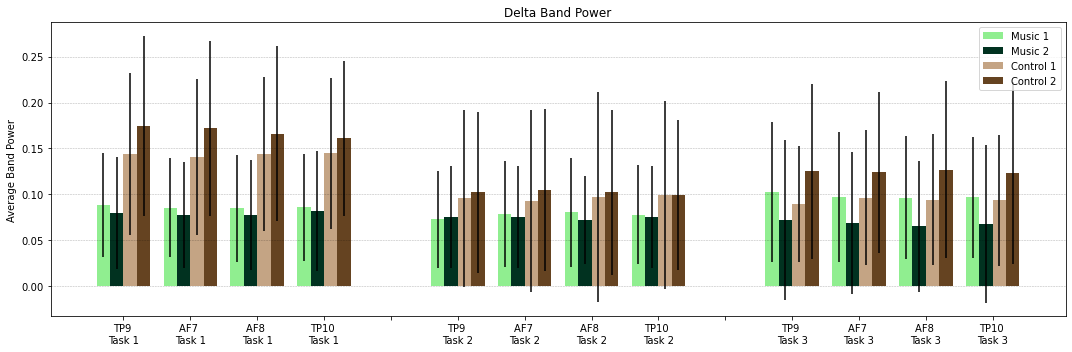

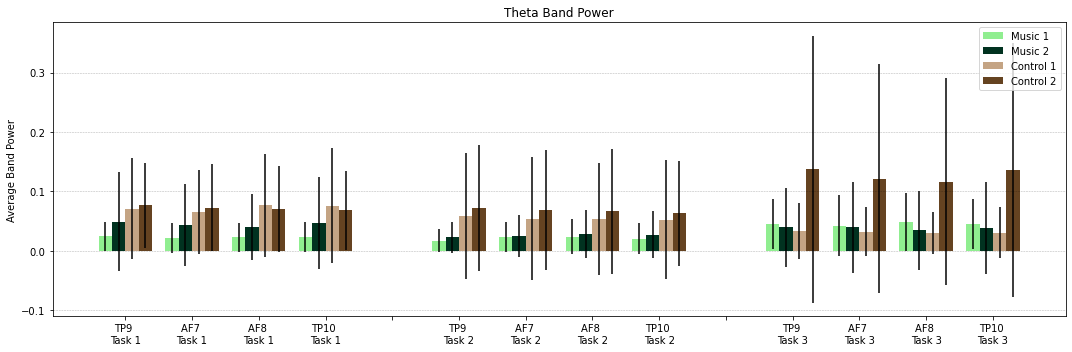

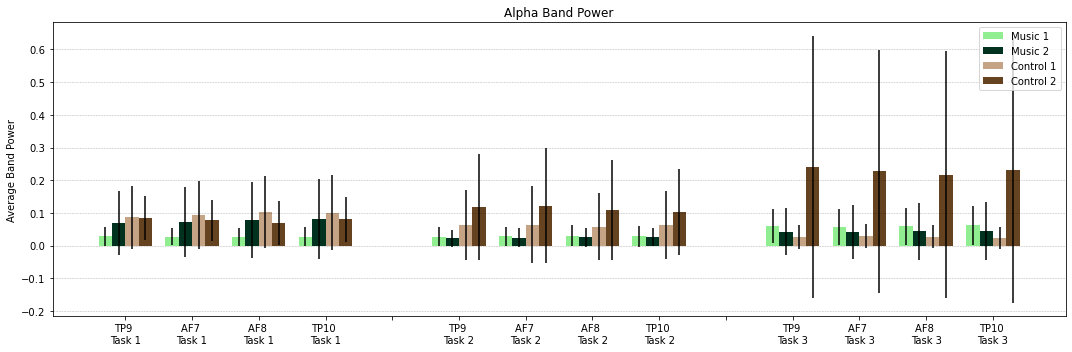

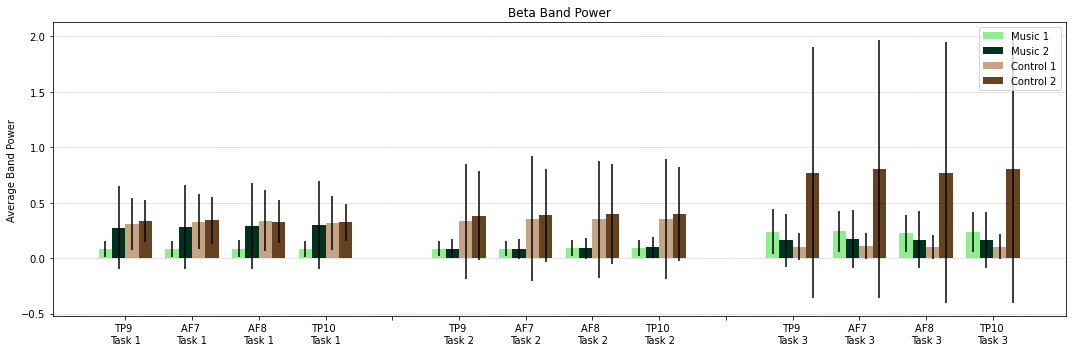

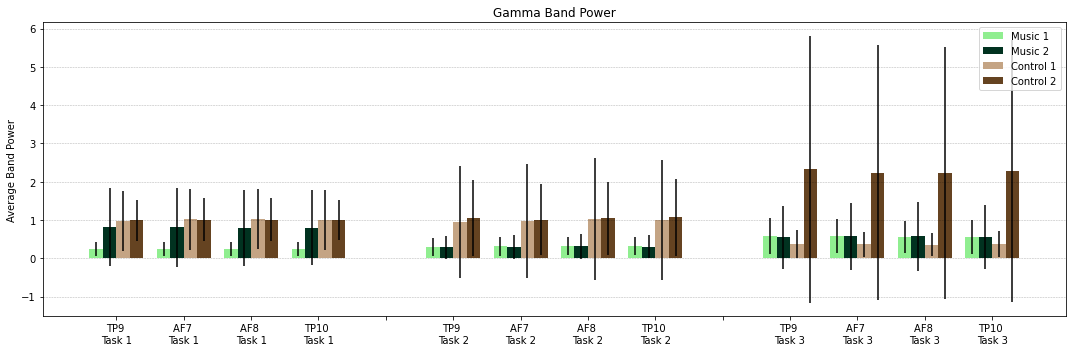

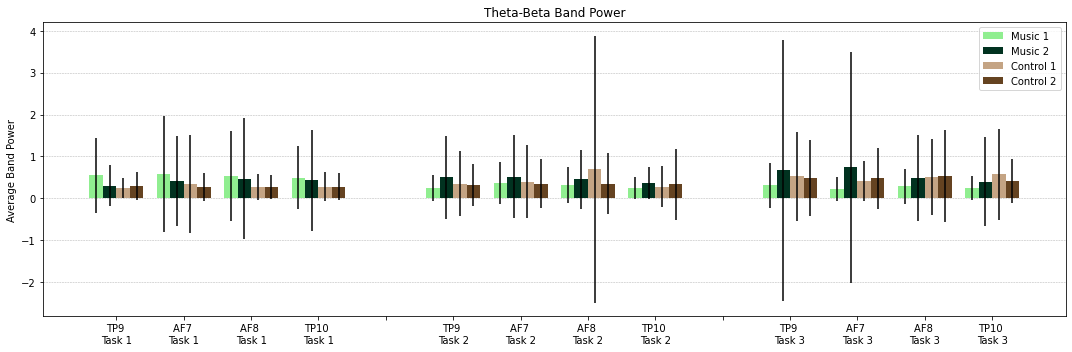

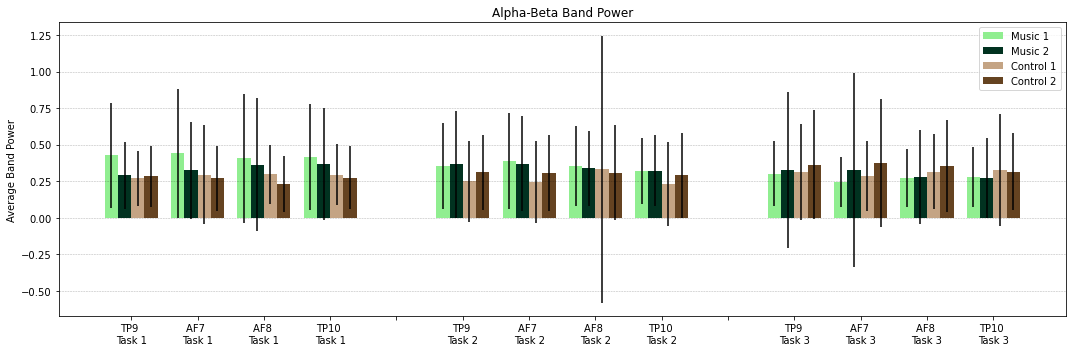

In [17]:
"""
Mean comparisons for bands that showed significant differences between the two groups 
(manually developed based on results from above)
"""

plot_averageBandPower([[delta_MT11,delta_MT12,delta_MT13],[delta_MT21,delta_MT22,delta_MT23]],
                        [[delta_CT11,delta_CT12,delta_CT13],[delta_CT21,delta_CT22,delta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Delta Band Power')

plot_averageBandPower([[theta_MT11,theta_MT12,theta_MT13],[theta_MT21,theta_MT22,theta_MT23]],
                        [[theta_CT11,theta_CT12,theta_CT13],[theta_CT21,theta_CT22,theta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta Band Power')

plot_averageBandPower([[alpha_MT11,alpha_MT12,alpha_MT13],[alpha_MT21,alpha_MT22,alpha_MT23]],
                        [[alpha_CT11,alpha_CT12,alpha_CT13],[alpha_CT21,alpha_CT22,alpha_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha Band Power')

plot_averageBandPower([[beta_MT11,beta_MT12,beta_MT13],[beta_MT21,beta_MT22,beta_MT23]],
                        [[beta_CT11,beta_CT12,beta_CT13],[beta_CT21,beta_CT22,beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Beta Band Power')

plot_averageBandPower([[gamma_MT11,gamma_MT12,gamma_MT13],[gamma_MT21,gamma_MT22,gamma_MT23]],
                        [[gamma_CT11,gamma_CT12,gamma_CT13],[gamma_CT21,gamma_CT22,gamma_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Gamma Band Power')
plot_averageBandPower([[theta_beta_MT11,theta_beta_MT12,theta_beta_MT13],[theta_beta_MT21,theta_beta_MT22,theta_beta_MT23]],
                        [[theta_beta_CT11,theta_beta_CT12,theta_beta_CT13],[theta_beta_CT21,theta_beta_CT22,theta_beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta-Beta Band Power')
plot_averageBandPower([[alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13],[alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23]],
                        [[alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13],[alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23]],  
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha-Beta Band Power')
                    

In [28]:
# merge delta result and export results to csv
group = np.hstack((np.repeat(['music'],len(delta_MT11)),np.repeat(['music'],len(delta_MT12)),
         np.repeat(['music'],len(delta_MT21)),np.repeat(['music'],len(delta_MT22)),
            np.repeat(['control'],len(delta_CT11)),np.repeat(['control'],len(delta_CT12)),
            np.repeat(['control'],len(delta_CT21)),np.repeat(['control'],len(delta_CT22))))
task = np.hstack((np.repeat([1],len(delta_MT11)),np.repeat([2],len(delta_MT12)),
        np.repeat([1],len(delta_MT21)),np.repeat([2],len(delta_MT22)),
        np.repeat([1],len(delta_CT11)),np.repeat([2],len(delta_CT12)),
        np.repeat([1],len(delta_CT21)),np.repeat([2],len(delta_CT22))))
time = np.hstack((np.repeat([1],len(delta_MT11)),np.repeat([1],len(delta_MT12)),
        np.repeat([2],len(delta_MT21)),np.repeat([2],len(delta_MT22)),
        np.repeat([1],len(delta_CT11)),np.repeat([1],len(delta_CT12)),
        np.repeat([2],len(delta_CT21)),np.repeat([2],len(delta_CT22))))

frequency_TP9 = np.hstack((delta_MT11[:,0],delta_MT12[:,0],delta_MT21[:,0],delta_MT22[:,0],
                delta_CT11[:,0],delta_CT12[:,0],delta_CT21[:,0],delta_CT22[:,0]))
frequency_AF7 = np.hstack((delta_MT11[:,1],delta_MT12[:,1],delta_MT21[:,1],delta_MT22[:,1],
                delta_CT11[:,1],delta_CT12[:,1],delta_CT21[:,1],delta_CT22[:,1]))
frequency_AF8 = np.hstack((delta_MT11[:,2],delta_MT12[:,2],delta_MT21[:,2],delta_MT22[:,2],
                delta_CT11[:,2],delta_CT12[:,2],delta_CT21[:,2],delta_CT22[:,2]))
frequency_TP10 = np.hstack((delta_MT11[:,3],delta_MT12[:,3],delta_MT21[:,3],delta_MT22[:,3],
                delta_CT11[:,3],delta_CT12[:,3],delta_CT21[:,3],delta_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/delta_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/delta_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/delta_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/delta_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/delta_mean_result.csv',index=False)

In [19]:
# merge theta result and export results to csv
group = np.hstack((np.repeat(['music'],len(theta_MT11)),np.repeat(['music'],len(theta_MT12)),
            np.repeat(['music'],len(theta_MT21)),np.repeat(['music'],len(theta_MT22)),
            np.repeat(['control'],len(theta_CT11)),np.repeat(['control'],len(theta_CT12)),
            np.repeat(['control'],len(theta_CT21)),np.repeat(['control'],len(theta_CT22))))
task = np.hstack((np.repeat([1],len(theta_MT11)),np.repeat([2],len(theta_MT12)),
            np.repeat([1],len(theta_MT21)),np.repeat([2],len(theta_MT22)),
            np.repeat([1],len(theta_CT11)),np.repeat([2],len(theta_CT12)),
            np.repeat([1],len(theta_CT21)),np.repeat([2],len(theta_CT22))))
time = np.hstack((np.repeat([1],len(theta_MT11)),np.repeat([1],len(theta_MT12)),
            np.repeat([2],len(theta_MT21)),np.repeat([2],len(theta_MT22)),
            np.repeat([1],len(theta_CT11)),np.repeat([1],len(theta_CT12)),
            np.repeat([2],len(theta_CT21)),np.repeat([2],len(theta_CT22))))

frequency_TP9 = np.hstack((theta_MT11[:,0],theta_MT12[:,0],theta_MT21[:,0],theta_MT22[:,0],
                theta_CT11[:,0],theta_CT12[:,0],theta_CT21[:,0],theta_CT22[:,0]))
frequency_AF7 = np.hstack((theta_MT11[:,1],theta_MT12[:,1],theta_MT21[:,1],theta_MT22[:,1],
                theta_CT11[:,1],theta_CT12[:,1],theta_CT21[:,1],theta_CT22[:,1]))
frequency_AF8 = np.hstack((theta_MT11[:,2],theta_MT12[:,2],theta_MT21[:,2],theta_MT22[:,2], 
                theta_CT11[:,2],theta_CT12[:,2],theta_CT21[:,2],theta_CT22[:,2]))
frequency_TP10 = np.hstack((theta_MT11[:,3],theta_MT12[:,3],theta_MT21[:,3],theta_MT22[:,3],
                theta_CT11[:,3],theta_CT12[:,3],theta_CT21[:,3],theta_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_mean_result.csv',index=False)

In [20]:
# merge alpha result and export results to csv
group = np.hstack((np.repeat(['music'],len(alpha_MT11)),np.repeat(['music'],len(alpha_MT12)),
            np.repeat(['music'],len(alpha_MT21)),np.repeat(['music'],len(alpha_MT22)),
            np.repeat(['control'],len(alpha_CT11)),np.repeat(['control'],len(alpha_CT12)),
            np.repeat(['control'],len(alpha_CT21)),np.repeat(['control'],len(alpha_CT22))))
task = np.hstack((np.repeat([1],len(alpha_MT11)),np.repeat([2],len(alpha_MT12)),
            np.repeat([1],len(alpha_MT21)),np.repeat([2],len(alpha_MT22)),
            np.repeat([1],len(alpha_CT11)),np.repeat([2],len(alpha_CT12)),
            np.repeat([1],len(alpha_CT21)),np.repeat([2],len(alpha_CT22))))
time = np.hstack((np.repeat([1],len(alpha_MT11)),np.repeat([1],len(alpha_MT12)),
            np.repeat([2],len(alpha_MT21)),np.repeat([2],len(alpha_MT22)),
            np.repeat([1],len(alpha_CT11)),np.repeat([1],len(alpha_CT12)),
            np.repeat([2],len(alpha_CT21)),np.repeat([2],len(alpha_CT22))))

frequency_TP9 = np.hstack((alpha_MT11[:,0],alpha_MT12[:,0],alpha_MT21[:,0],alpha_MT22[:,0],
                alpha_CT11[:,0],alpha_CT12[:,0],alpha_CT21[:,0],alpha_CT22[:,0]))
frequency_AF7 = np.hstack((alpha_MT11[:,1],alpha_MT12[:,1],alpha_MT21[:,1],alpha_MT22[:,1],
                alpha_CT11[:,1],alpha_CT12[:,1],alpha_CT21[:,1],alpha_CT22[:,1]))
frequency_AF8 = np.hstack((alpha_MT11[:,2],alpha_MT12[:,2],alpha_MT21[:,2],alpha_MT22[:,2],
                alpha_CT11[:,2],alpha_CT12[:,2],alpha_CT21[:,2],alpha_CT22[:,2]))
frequency_TP10 = np.hstack((alpha_MT11[:,3],alpha_MT12[:,3],alpha_MT21[:,3],alpha_MT22[:,3],
                alpha_CT11[:,3],alpha_CT12[:,3],alpha_CT21[:,3],alpha_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_mean_result.csv',index=False)

In [21]:
# merge beta result and export results to csv
group = np.hstack((np.repeat(['music'],len(beta_MT11)),np.repeat(['music'],len(beta_MT12)),
            np.repeat(['music'],len(beta_MT21)),np.repeat(['music'],len(beta_MT22)),
            np.repeat(['control'],len(beta_CT11)),np.repeat(['control'],len(beta_CT12)),
            np.repeat(['control'],len(beta_CT21)),np.repeat(['control'],len(beta_CT22))))
task = np.hstack((np.repeat([1],len(beta_MT11)),np.repeat([2],len(beta_MT12)),
            np.repeat([1],len(beta_MT21)),np.repeat([2],len(beta_MT22)),
            np.repeat([1],len(beta_CT11)),np.repeat([2],len(beta_CT12)),
            np.repeat([1],len(beta_CT21)),np.repeat([2],len(beta_CT22))))
time = np.hstack((np.repeat([1],len(beta_MT11)),np.repeat([1],len(beta_MT12)),
            np.repeat([2],len(beta_MT21)),np.repeat([2],len(beta_MT22)),
            np.repeat([1],len(beta_CT11)),np.repeat([1],len(beta_CT12)),
            np.repeat([2],len(beta_CT21)),np.repeat([2],len(beta_CT22))))

frequency_TP9 = np.hstack((beta_MT11[:,0],beta_MT12[:,0],beta_MT21[:,0],beta_MT22[:,0],
                beta_CT11[:,0],beta_CT12[:,0],beta_CT21[:,0],beta_CT22[:,0]))
frequency_AF7 = np.hstack((beta_MT11[:,1],beta_MT12[:,1],beta_MT21[:,1],beta_MT22[:,1],
                beta_CT11[:,1],beta_CT12[:,1],beta_CT21[:,1],beta_CT22[:,1]))
frequency_AF8 = np.hstack((beta_MT11[:,2],beta_MT12[:,2],beta_MT21[:,2],beta_MT22[:,2],
                beta_CT11[:,2],beta_CT12[:,2],beta_CT21[:,2],beta_CT22[:,2]))
frequency_TP10 = np.hstack((beta_MT11[:,3],beta_MT12[:,3],beta_MT21[:,3],beta_MT22[:,3],
                beta_CT11[:,3],beta_CT12[:,3],beta_CT21[:,3],beta_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/beta_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/beta_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/beta_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/beta_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/beta_mean_result.csv',index=False)

In [22]:
# merge gamma result and export results to csv
group = np.hstack((np.repeat(['music'],len(gamma_MT11)),np.repeat(['music'],len(gamma_MT12)),
            np.repeat(['music'],len(gamma_MT21)),np.repeat(['music'],len(gamma_MT22)),
            np.repeat(['control'],len(gamma_CT11)),np.repeat(['control'],len(gamma_CT12)),
            np.repeat(['control'],len(gamma_CT21)),np.repeat(['control'],len(gamma_CT22))))
task = np.hstack((np.repeat([1],len(gamma_MT11)),np.repeat([2],len(gamma_MT12)),
            np.repeat([1],len(gamma_MT21)),np.repeat([2],len(gamma_MT22)),
            np.repeat([1],len(gamma_CT11)),np.repeat([2],len(gamma_CT12)),
            np.repeat([1],len(gamma_CT21)),np.repeat([2],len(gamma_CT22))))
time = np.hstack((np.repeat([1],len(gamma_MT11)),np.repeat([1],len(gamma_MT12)),
            np.repeat([2],len(gamma_MT21)),np.repeat([2],len(gamma_MT22)),
            np.repeat([1],len(gamma_CT11)),np.repeat([1],len(gamma_CT12)),
            np.repeat([2],len(gamma_CT21)),np.repeat([2],len(gamma_CT22))))

frequency_TP9 = np.hstack((gamma_MT11[:,0],gamma_MT12[:,0],gamma_MT21[:,0],gamma_MT22[:,0],
                gamma_CT11[:,0],gamma_CT12[:,0],gamma_CT21[:,0],gamma_CT22[:,0]))
frequency_AF7 = np.hstack((gamma_MT11[:,1],gamma_MT12[:,1],gamma_MT21[:,1],gamma_MT22[:,1],
                gamma_CT11[:,1],gamma_CT12[:,1],gamma_CT21[:,1],gamma_CT22[:,1]))
frequency_AF8 = np.hstack((gamma_MT11[:,2],gamma_MT12[:,2],gamma_MT21[:,2],gamma_MT22[:,2],
                gamma_CT11[:,2],gamma_CT12[:,2],gamma_CT21[:,2],gamma_CT22[:,2]))
frequency_TP10 = np.hstack((gamma_MT11[:,3],gamma_MT12[:,3],gamma_MT21[:,3],gamma_MT22[:,3],
                gamma_CT11[:,3],gamma_CT12[:,3],gamma_CT21[:,3],gamma_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/gamma_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/gamma_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/gamma_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/gamma_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/gamma_mean_result.csv',index=False)

In [23]:
# merger theta-beta results and export results to csv
group = np.hstack((np.repeat(['music'],len(theta_beta_MT11)),np.repeat(['music'],len(theta_beta_MT12)),
            np.repeat(['music'],len(theta_beta_MT21)),np.repeat(['music'],len(theta_beta_MT22)),
            np.repeat(['control'],len(theta_beta_CT11)),np.repeat(['control'],len(theta_beta_CT12)),
            np.repeat(['control'],len(theta_beta_CT21)),np.repeat(['control'],len(theta_beta_CT22))))
task = np.hstack((np.repeat([1],len(theta_beta_MT11)),np.repeat([2],len(theta_beta_MT12)),
            np.repeat([1],len(theta_beta_MT21)),np.repeat([2],len(theta_beta_MT22)),
            np.repeat([1],len(theta_beta_CT11)),np.repeat([2],len(theta_beta_CT12)),
            np.repeat([1],len(theta_beta_CT21)),np.repeat([2],len(theta_beta_CT22))))
time = np.hstack((np.repeat([1],len(theta_beta_MT11)),np.repeat([1],len(theta_beta_MT12)),
            np.repeat([2],len(theta_beta_MT21)),np.repeat([2],len(theta_beta_MT22)),
            np.repeat([1],len(theta_beta_CT11)),np.repeat([1],len(theta_beta_CT12)),
            np.repeat([2],len(theta_beta_CT21)),np.repeat([2],len(theta_beta_CT22))))

frequency_TP9 = np.hstack((theta_beta_MT11[:,0],theta_beta_MT12[:,0],theta_beta_MT21[:,0],theta_beta_MT22[:,0],
                theta_beta_CT11[:,0],theta_beta_CT12[:,0],theta_beta_CT21[:,0],theta_beta_CT22[:,0]))
frequency_AF7 = np.hstack((theta_beta_MT11[:,1],theta_beta_MT12[:,1],theta_beta_MT21[:,1],theta_beta_MT22[:,1],
                theta_beta_CT11[:,1],theta_beta_CT12[:,1],theta_beta_CT21[:,1],theta_beta_CT22[:,1]))
frequency_AF8 = np.hstack((theta_beta_MT11[:,2],theta_beta_MT12[:,2],theta_beta_MT21[:,2],theta_beta_MT22[:,2],
                theta_beta_CT11[:,2],theta_beta_CT12[:,2],theta_beta_CT21[:,2],theta_beta_CT22[:,2]))
frequency_TP10 = np.hstack((theta_beta_MT11[:,3],theta_beta_MT12[:,3],theta_beta_MT21[:,3],theta_beta_MT22[:,3],
                theta_beta_CT11[:,3],theta_beta_CT12[:,3],theta_beta_CT21[:,3],theta_beta_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_beta_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_beta_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_beta_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_beta_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/theta_beta_mean_result.csv',index=False)

In [24]:
# merge alpha-beta results and export results to csv
group = np.hstack((np.repeat(['music'],len(alpha_beta_MT11)),np.repeat(['music'],len(alpha_beta_MT12)),
            np.repeat(['music'],len(alpha_beta_MT21)),np.repeat(['music'],len(alpha_beta_MT22)),
            np.repeat(['control'],len(alpha_beta_CT11)),np.repeat(['control'],len(alpha_beta_CT12)),
            np.repeat(['control'],len(alpha_beta_CT21)),np.repeat(['control'],len(alpha_beta_CT22))))
task = np.hstack((np.repeat([1],len(alpha_beta_MT11)),np.repeat([2],len(alpha_beta_MT12)),
            np.repeat([1],len(alpha_beta_MT21)),np.repeat([2],len(alpha_beta_MT22)),
            np.repeat([1],len(alpha_beta_CT11)),np.repeat([2],len(alpha_beta_CT12)),
            np.repeat([1],len(alpha_beta_CT21)),np.repeat([2],len(alpha_beta_CT22))))
time = np.hstack((np.repeat([1],len(alpha_beta_MT11)),np.repeat([1],len(alpha_beta_MT12)),
            np.repeat([2],len(alpha_beta_MT21)),np.repeat([2],len(alpha_beta_MT22)),
            np.repeat([1],len(alpha_beta_CT11)),np.repeat([1],len(alpha_beta_CT12)),
            np.repeat([2],len(alpha_beta_CT21)),np.repeat([2],len(alpha_beta_CT22))))

frequency_TP9 = np.hstack((alpha_beta_MT11[:,0],alpha_beta_MT12[:,0],alpha_beta_MT21[:,0],alpha_beta_MT22[:,0],
                alpha_beta_CT11[:,0],alpha_beta_CT12[:,0],alpha_beta_CT21[:,0],alpha_beta_CT22[:,0]))
frequency_AF7 = np.hstack((alpha_beta_MT11[:,1],alpha_beta_MT12[:,1],alpha_beta_MT21[:,1],alpha_beta_MT22[:,1],
                alpha_beta_CT11[:,1],alpha_beta_CT12[:,1],alpha_beta_CT21[:,1],alpha_beta_CT22[:,1]))
frequency_AF8 = np.hstack((alpha_beta_MT11[:,2],alpha_beta_MT12[:,2],alpha_beta_MT21[:,2],alpha_beta_MT22[:,2],
                alpha_beta_CT11[:,2],alpha_beta_CT12[:,2],alpha_beta_CT21[:,2],alpha_beta_CT22[:,2]))
frequency_TP10 = np.hstack((alpha_beta_MT11[:,3],alpha_beta_MT12[:,3],alpha_beta_MT21[:,3],alpha_beta_MT22[:,3],
                alpha_beta_CT11[:,3],alpha_beta_CT12[:,3],alpha_beta_CT21[:,3],alpha_beta_CT22[:,3]))
frequency_mean = np.mean(np.vstack((frequency_TP9,frequency_AF7,frequency_AF8,frequency_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_beta_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_beta_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_beta_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_beta_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'frequency':frequency_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/alpha_beta_mean_result.csv',index=False)